In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
from scipy import optimize

## Q2

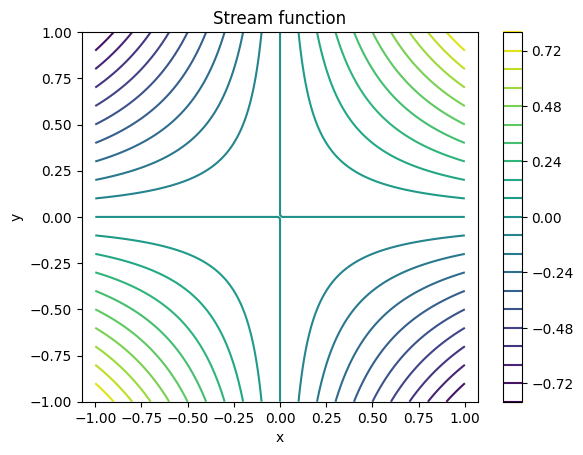

In [3]:

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
A = 0.8
psi = A * X * Y
CS = plt.contour(X, Y, psi, 20)
plt.axis('equal')
plt.colorbar(CS)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stream function')
plt.show()

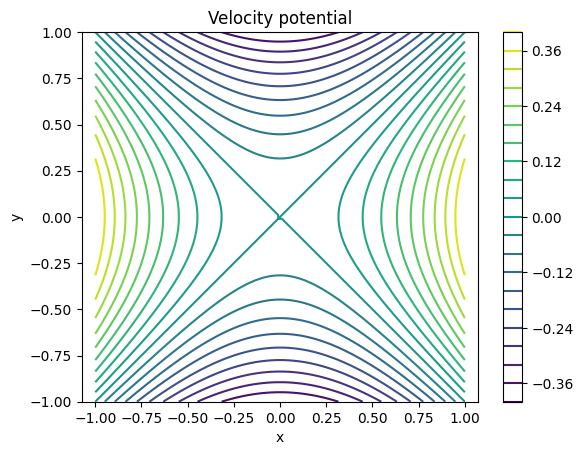

In [4]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
A = 0.8
phi = A * (X**2 - Y**2) / 2
CS = plt.contour(X, Y, phi, 20)
plt.axis('equal')
plt.colorbar(CS)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity potential')
plt.show()

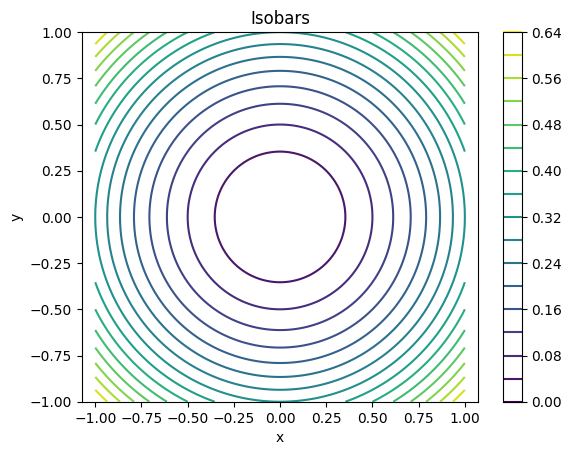

In [5]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
A = 0.8
P = A**2 * (X**2 + Y**2) / 2
CS = plt.contour(X, Y, P, 20)
plt.axis('equal')
plt.colorbar(CS)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Isobars')
plt.show()

## Q3

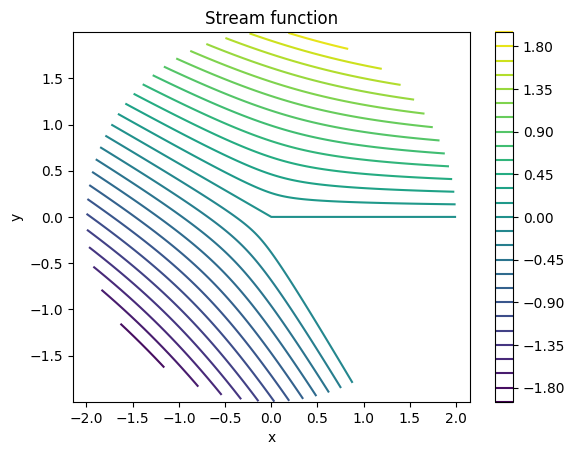

In [6]:
r = np.linspace(0, 2, 200)
theta = np.linspace(0, 5*np.pi/3, 100)
R, THETA = np.meshgrid(r, theta)
A = 0.8
psi = A * R ** (6/5) * np.sin(6 * THETA / 5)
X = R * np.cos(THETA)
Y = R * np.sin(THETA)
CS = plt.contour(X, Y, psi, 30)
plt.axis('equal')
plt.colorbar(CS)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stream function')
plt.show()

# Q5 solve

In [7]:
def f(x):
    return 1 / np.tan(np.pi / 0.1 * x) - x 

root = optimize.fsolve(f, 0.05)[0]

htoa = (0.1 / np.pi + 1) ** 0.5
print(htoa / root)

20.96198343627632


## Q9 plot

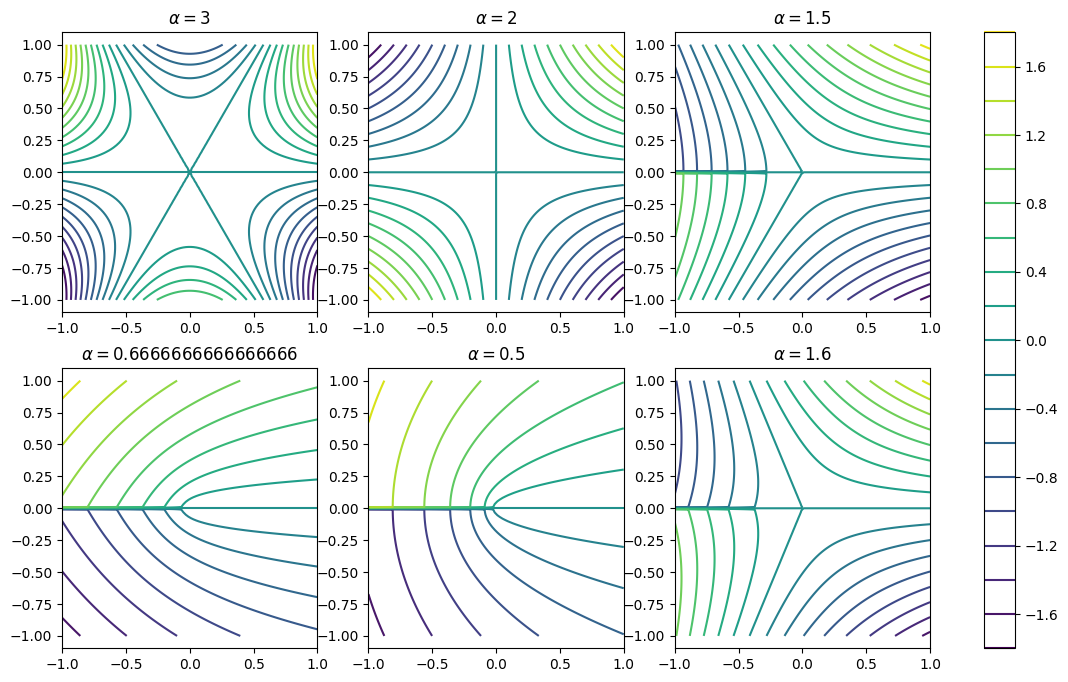

In [8]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
A = 1.0
alphas = [3, 2, 3/2, 2/3, 1/2, 3/2 + 0.1]

fig,axes = plt.subplots(2, 3, figsize=(14, 8))
for ax, alpha in zip(axes.flat, alphas):
    FZ = A * Z ** alpha
    #ax.contour(X, Y, FZ.real, 20)
    CS = ax.contour(X, Y, FZ.imag, 20)
    ax.axis('equal')
    ax.set_title(r'$\alpha = {}$'.format(alpha))

plt.colorbar(CS, ax=axes.ravel().tolist())#
plt.savefig('fig1.png')
plt.show()


# Q13

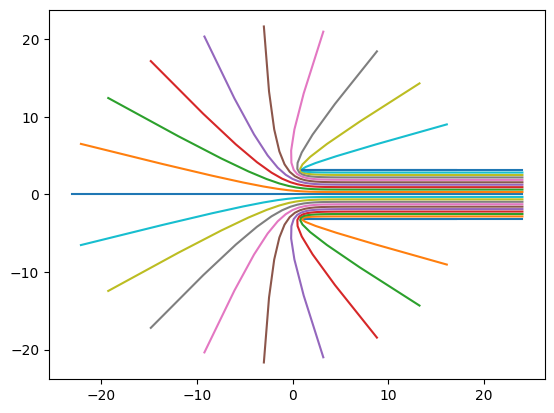

In [9]:

phi_0 = np.linspace(-3, 24, 51, endpoint=True)
psi_0 = np.linspace(-np.pi, np.pi, 21, endpoint=True)

PSI, PHI = np.meshgrid(psi_0, phi_0)

F = PHI + 1j * PSI
z = F - np.exp(-F)

fig,ax = plt.subplots()

ax.plot(z.real, z.imag)


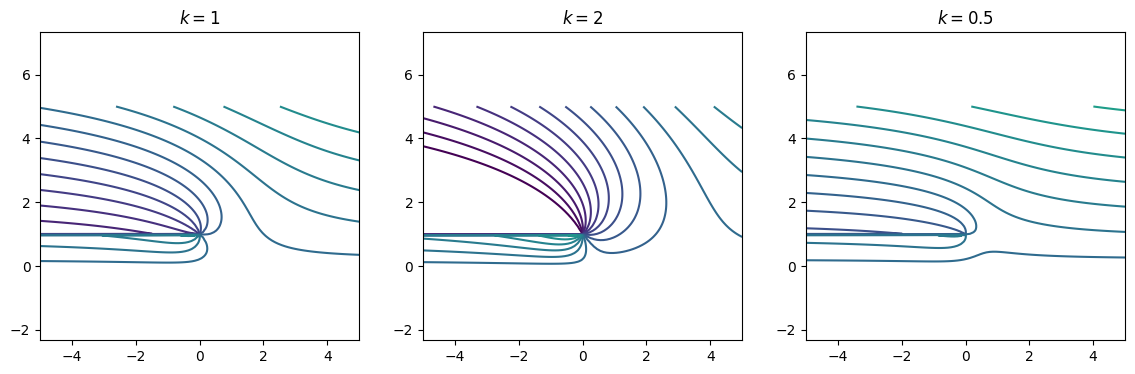

In [13]:
k = [1, 2, 0.5]

fig,axes = plt.subplots(1, 3, figsize=(14, 4))

x,y = np.linspace(-5, 5, 100), np.linspace(0, 5, 100)
X,Y = np.meshgrid(x, y)
Z = X + 1j * Y

contour_levels = np.linspace(-2*np.pi, 4*np.pi, 30)

for ax, k in zip(axes.flat, k):
    F = Z - k * (np.log(Z - 1j) + np.log(Z + 1j))
    ax.contour(X, Y, F.imag, contour_levels)
    ax.axis('equal')
    ax.set_title(r'$k = {}$'.format(k))

plt.show()

[0.         0.02002002 0.04004004 1.72172172 1.74174174]


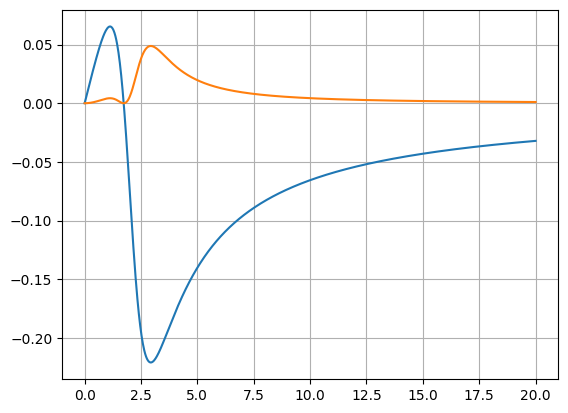

In [35]:
x = np.linspace(0, 20, 1000)

a = 1
m = 1
xm2a = x - 2*a
xp2a = x + 2*a
u = - m / np.pi * ( xm2a / (xm2a**2 + a**2) + xp2a / (xp2a**2 + a**2))

idx_min = np.where(np.isclose(u**2, 0, atol=1e-5))
print(x[idx_min])

plt.plot(x, u)
plt.plot(x, u**2)
plt.grid()

# Q18

C:\Users\louis\AppData\Local\Temp\ipykernel_16620\2037884517.py:10: RuntimeWarning: divide by zero encountered in log
  F = -1j * gamma / (2 * np.pi) * (np.log(Z - a - 1j * h) - np.log(Z - a + 1j * h) - np.log(Z + a - 1j * h) + np.log(Z + a + 1j * h))
C:\Users\louis\AppData\Local\Temp\ipykernel_16620\2037884517.py:10: RuntimeWarning: invalid value encountered in multiply
  F = -1j * gamma / (2 * np.pi) * (np.log(Z - a - 1j * h) - np.log(Z - a + 1j * h) - np.log(Z + a - 1j * h) + np.log(Z + a + 1j * h))


(-3.0, 3.0, 0.0, 3.0)

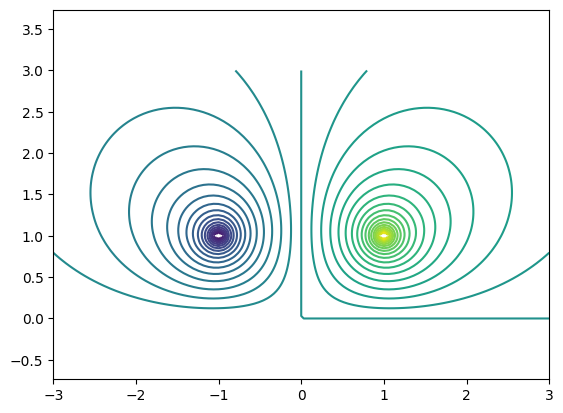

In [53]:
h = 1
a = 1
gamma = 2 * np.pi

x,y = np.linspace(-3, 3, 100), np.linspace(0, 3, 100)
X,Y = np.meshgrid(x, y)

Z = X + 1j * Y

F = -1j * gamma / (2 * np.pi) * (np.log(Z - a - 1j * h) - np.log(Z - a + 1j * h) - np.log(Z + a - 1j * h) + np.log(Z + a + 1j * h))

plt.contour(X, Y, F.imag, 50)
plt.axis('equal')